In [ ]:
#@title Código para selecionar uma questão da lista com opções de resposta
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random


def questao_aleatorio_lista_dropdown(l,cabecalho=""):
  x = random.randrange(len(l))
  print(cabecalho+l[x][0]+"?")

  r = ["selecione"]
  for i in l:
    r.append(i[1])

  def op(resposta):
    if (resposta== l[x][1]):
      return "Correto !"
    else:
      return "Tente novamente !"

  interact(op,resposta=r)

In [ ]:
#@title Exemplo 1 (sem predição, desvio no Decode)
%%writefile arquivo.csv
pc; inst ; F; D; E; W; comment
0; add r1,r1,r1; 1; 2; 3; 4; r1  = 2
4; add r2,r2,r2; 2; 3; 4; 5 ; r2 = 4
8; L2: beq r1,r2,L1; 3; 4-5; ; ; wait r2
12 ;sub r2,r2,1; 4-5; 6; 7; 8 ; r2 = 3
16; beq r0,r0,L2; 6; 7; ; ; branch
20; L1: nop; 7; ; ;; abort
8; L2: beq r1,r2,L1; 8; 9;
12; sub r2,r2,1; 9; 10; 11; 12; r2 = 2
16; beq r0,r0,L2; 10; 11;
20; L1: nop; 11;
8; L2: beq r1,r2,L1; 12; 13;
12; sub r2,r2,1; 13; ; ;; abort
20; L1: nop; 14; 15; 16; 17; end



Writing arquivo.csv


In [ ]:
#@title Converter csv para tabela
import csv
from IPython.display import Markdown

def csv2markdown():
  with open('arquivo.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile,delimiter=';')
    table = []
    for row in csvreader:
        table.append(row)

    md_table = '| ' + ' | '.join(table[0]) + ' |\n| ' + ' | '.join(['---'] * len(table[0])) + ' |\n'
  for row in table[1:]:
    md_table += '| ' + ' | '.join(row) + ' |\n'

  display(Markdown(md_table))

csv2markdown()


| pc |  inst  |  F |  D |  E |  W |  comment |
| --- | --- | --- | --- | --- | --- | --- |
| 0 |  add r1,r1,r1 |  1 |  2 |  3 |  4 |  r1  = 2 |
| 4 |  add r2,r2,r2 |  2 |  3 |  4 |  5  |  r2 = 4 |
| 8 |  L2: beq r1,r2,L1 |  3 |  4-5 |   |   |  wait r2 |
| 12  | sub r2,r2,1 |  4-5 |  6 |  7 |  8  |  r2 = 3 |
| 16 |  beq r0,r0,L2 |  6 |  7 |   |   |  branch |
| 20 |  L1: nop |  7 |   |   |  |  abort |
| 8 |  L2: beq r1,r2,L1 |  8 |  9 |   |
| 12 |  sub r2,r2,1 |  9 |  10 |  11 |  12 |  r2 = 2 |
| 16 |  beq r0,r0,L2 |  10 |  11 |  |
| 20 |  L1: nop |  11 |   |
| 8 |  L2: beq r1,r2,L1 |  12 |  13 |   |
| 12 |  sub r2,r2,1 |  13 |   |   |  |  abort |
| 20 |  L1: nop |  14 |  15 |  16 |  17 |  end  |
|  |


# Preditor Estático


A técnica de predição de desvio estático é uma técnica que tenta prever, no momento da compilação ou do projeto, qual caminho de execução mais provável de ser tomado em um desvio condicional. Isso é feito analisando o código fonte do programa e utilizando técnicas de análise estática para determinar a probabilidade de cada caminho de execução ser tomado.



Um maneira mais simples ainda é prever que o desvio sempre será tomado, ou seja, sempre seguir sequencialmente, que na maioria dos casos é implementada incrementando o contador de programa $PC$ ($pc = pc++$ ) no estágio de busca.

Em uma arquitetura de processador também podemos  utilizar a técnica Branch Delay, a instrução (ou instruções, depende do número de slots) que segue um desvio condicional é executada antes de ser determinado se o desvio será tomado ou não. Isso é possível porque o resultado do desvio condicional não afeta o resultado da instrução seguinte.

Existem várias outras técnicas de análise estática que podem ser utilizadas para prever o comportamento de um programa em tempo de execução. Uma técnica comum é a análise de fluxo de controle, que analisa o grafo de controle de fluxo do programa para determinar quais caminhos de execução são possíveis.



## Tomado ou não tomado

A estatística de desvio tomado e não tomado depende do programa em questão e pode variar bastante de acordo com o seu comportamento. Em geral, programas com muitos desvios condicionais podem ter uma proporção significativa de desvios tomados devido a laços, chamada de funções, testes condicionais, etc.



In [ ]:
#@title Considerando as técnicas de Preditores estáticos

cabecalho = "Cite "

# lista de pares questao/resposta
l = [ ["dois exemplos","branch delay, não tomado"],["exemplos que podem ser difíceis de implementar ","tomado"], ["exemplos fácil de implementar","não tomado"], ["exemplos que depende do compilador","desvios com atraso, tomado"] ]

questao_aleatorio_lista_dropdown(l,cabecalho)


Cite exemplos fácil de implementar?


interactive(children=(Dropdown(description='resposta', options=('selecione', 'branch delay, não tomado', 'toma…

In [ ]:
#@title Se você tem $T_d$ de desvios em um código que usa predição estática não seguido (ou não tomado) com uma taxa de acerto $T_a$. Qual é o CPI ?
import random

def gera_questao_desvio(penalidade=1):
  taxadesvio = round(random.randint(10, 40)/100,2)
  taxaacerto = round(random.randint(50, 90)/100,2)
  cpi = 1 + (1 - taxaacerto)*taxadesvio*penalidade
  cpi = round(cpi,2)
  s = "Com "+str(round(taxadesvio*100,2))+"% de desvio e taxa de acerto "+str(round(taxaacerto*100,2))+"%"
  return s,str(cpi)

cabecalho = "Calcule o CPI para as taxas: "
L = []
for i in range(5):
  p,r = gera_questao_desvio()
  L.append([p,r])

questao_aleatorio_lista_dropdown(L,cabecalho)


'Correto !'

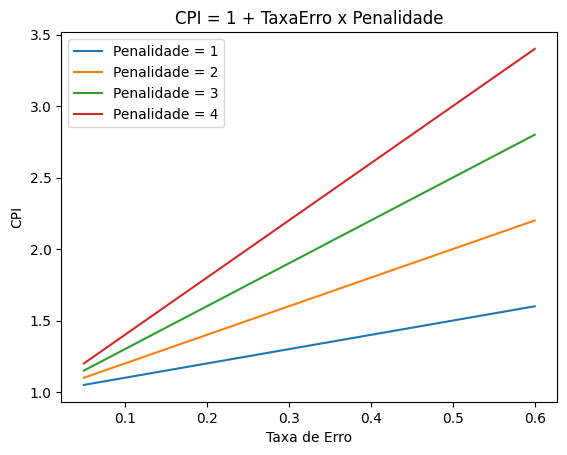

In [ ]:
#@title grafico com ChatGPT
import matplotlib.pyplot as plt
import numpy as np

# Valores de penalidade
penalties = [1, 2, 3, 4]

# Cria uma figura e um eixo
fig, ax = plt.subplots()

# Loop pelos valores de penalidade
for penalty in penalties:
    # Cria uma lista com as taxas de erro variando de 0.05 a 0.6
    error_rates = np.linspace(0.05, 0.6, 100)

    # Calcula os valores de CPI para cada taxa de erro
    cpi_values = [1 + error_rate * penalty for error_rate in error_rates]

    # Plota uma linha para cada valor de penalidade
    ax.plot(error_rates, cpi_values, label=f'Penalidade = {penalty}')

# Configura os eixos e legendas
ax.set_xlabel('Taxa de Erro')
ax.set_ylabel('CPI')
ax.set_title('CPI = 1 + TaxaErro x Penalidade')
ax.legend()

# Mostra o gráfico
plt.show()


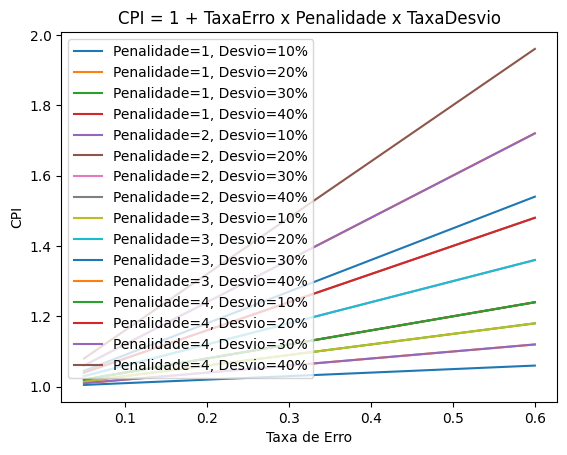

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de penalidade
penalties = [1, 2, 3, 4]

# Cria uma figura e um eixo
fig, ax = plt.subplots()

# Loop pelos valores de penalidade
for penalty in penalties:
    # Cria uma lista com as taxas de erro variando de 0.05 a 0.6
    error_rates = np.linspace(0.05, 0.6, 100)

    # Loop pelas taxas de desvio variando de 10% a 40%
    for deviation_rate in np.linspace(0.1, 0.4, 4):
        # Calcula os valores de CPI para cada taxa de erro e taxa de desvio
        cpi_values = [1 + error_rate * penalty * deviation_rate for error_rate in error_rates]

        # Plota uma linha para cada valor de penalidade e taxa de desvio
        ax.plot(error_rates, cpi_values, label=f'Penalidade={penalty}, Desvio={deviation_rate:.0%}')

# Configura os eixos e legendas
ax.set_xlabel('Taxa de Erro')
ax.set_ylabel('CPI')
ax.set_title('CPI = 1 + TaxaErro x Penalidade x TaxaDesvio')
ax.legend()

# Mostra o gráfico
plt.show()


In [ ]:
#@title Considere agora uma penalidade quando erra a predição de desvios

penalidade = random.randint(2,5)
cabecalho = "Calcule o CPI, com a penalidade de erro da predição de "+str(penalidade)+" ciclos com  as taxas: "
L = []
for i in range(5):
  p,r = gera_questao_desvio(penalidade)
  L.append([p,r])

questao_aleatorio_lista_dropdown(L,cabecalho)




Calcule o CPI, com a penalidade de erro da predição de 4 ciclos com  as taxas: Com 40.0% de desvio e taxa de acerto 60.0%?


interactive(children=(Dropdown(description='resposta', options=('selecione', '1.64', '1.21', '1.38', '1.15', '…

In [ ]:
#@title Suponha o Desvio com Atraso ou Branch Delay. Suponha um branch delay de 2 slots, o compilador preencheu $T_2$  slots com duas instruções e $T_1$ com uma instrução e você tem $T_D$ de desvios. Qual o CPI ?

def gera_questao_branchdelay():
  t2 = round(random.randint(40, 60)/100,2)
  t1 = round(random.randint(10, 30)/100,2)
  td = round(random.randint(10, 30)/100,2)
  t0 = 1 - t2 - t1
  cpi = 1 + td*(2*t0+ 1 * t1)
  cpi = round(cpi,2)
  s = "Com "+str(round(td*100,2))+"% de desvio \n com preenchimento de 2 slots em "+str(round(t2*100,2))+"% dos casos"
  s+= " e 1 slot em "+str(round(t1*100,2))+"% dos casos"
  return s,str(cpi)


penalidade = random.randint(2,5)
cabecalho = "Calcule o CPI para desvio com atrasos com  as taxas: "
L = []
for i in range(5):
  p,r = gera_questao_branchdelay()
  L.append([p,r])

questao_aleatorio_lista_dropdown(L,cabecalho)




Calcule o CPI para desvio com atrasos com  as taxas: Com 15.0% de desvio 
 com preenchimento de 2 slots em 44.0% dos casos e 1 slot em 26.0% dos casos?


interactive(children=(Dropdown(description='resposta', options=('selecione', '1.09', '1.13', '1.11', '1.17', '…

In [ ]:
#@title Se você tem $D\%$ de desvios e um preditor com $T_a$ de acerto em um computador superscalar que busca I instruções por ciclo. SUponha penalidade de N ciclos. Qual é o CPI ?
import random

def gera_questao_desvio_super(penalidade=1,superscalar=1):
  taxadesvio = round(random.randint(10, 40)/100,2)
  taxaacerto = round(random.randint(70, 95)/100,2)
  cpi = 1/superscalar + (1 - taxaacerto)*taxadesvio*penalidade
  cpi = round(cpi,2)
  s = "Superscalar "+str(superscalar)+" instruções/ciclo com penalidade de erro da predição de "+str(penalidade)+" ciclos, \n"
  s += "com "+str(round(taxadesvio*100,2))+"% de desvio e taxa de acerto "+str(round(taxaacerto*100,2))+"%"
  return s,str(cpi)

cabecalho = "Calcule o CPI para as taxas: "
L = []
for i in range(5):
  super = random.randint(2,5)
  penalidade = random.randint(3,5)
  p,r = gera_questao_desvio_super(penalidade,super)
  L.append([p,r])

questao_aleatorio_lista_dropdown(L,cabecalho)


Calcule o CPI para as taxas: Superscalar 2 instruções/ciclo com penalidade de erro da predição de 3 ciclos, 
com 26.0% de desvio e taxa de acerto 86.0%?


interactive(children=(Dropdown(description='resposta', options=('selecione', '0.67', '0.51', '0.39', '0.61', '…

Suponha 500 instruções. pipeline de 20 estágios, 5 instruções executadas por ciclo em um superscalar, cada bloco tem um instrução de desvio. Quantos ciclos para executar 500 instruções com acerto de 99% ?

ciclos = 100 + 1 * 20 = 120.
Ideal seria 100, executou em 120, então perda de 20%.


In [ ]:
#@title Quantos ciclos para exemplo anterior, com $T_a$ taxa de acerto ?
import random

def gera_questao_ciclos_super():
  taxaacerto = round(random.randint(40, 95))
  ciclos = 100 + 20*(100 - taxaacerto)
  ciclos = round(ciclos)
  s = " taxa de acerto "+str(round(taxaacerto))+"%"
  return s,str(ciclos)

cabecalho = "Ideal seria 100 ciclos apenas, porém com erro na predição, o tempo aumenta. \n Calcule o numero de ciclos para 500 instruções com "
L = []
for i in range(5):
  p,r = gera_questao_ciclos_super()
  L.append([p,r])

questao_aleatorio_lista_dropdown(L,cabecalho)

Ideal seria 100 ciclos apenas, porém com erro na predição, o tempo aumenta. 
 Calcule o numero de ciclos para 500 instruções com  taxa de acerto 71%?


interactive(children=(Dropdown(description='resposta', options=('selecione', '220', '1220', '540', '680', '560…




6. Qual é o custo (tamanho da tabela em bits) de um preditor de 2 bits com 1024 entradas, endereços de 32 bits ?

Custo = tamanho tabela * ( Bits_predicao + Bits_destino + Bits_Tag)

Para o exemplo Custo = 1024 ( 2 + (32-10) + 32) = 1024* ( 2 + 22 + 32 ) = 56Kbits.

![](https://github.com/arduinoufv/inf450/blob/master/figures/preditor2biys.png?raw=true)


[link para desenho online](https://excalidraw.com/#json=2lTTqBG3ylseHWY0Gk1_3,9ONxk9jFC2_Wxcx3DrDxEg)



7. Qual é o custo do preditor com correlação que usa os 2 ultimos desvios globais com um contador de 2 bits por predição com 2048 palpites, endereço de 64 bits ?

custo será semelhante ao exercicio 6, apenas o registro de 2 bits global que irá espalhar a predicao na tabela.

custo = 2048 * ( 2 + (64-11) + 64) bits
![](https://github.com/arduinoufv/inf450/blob/master/figures/preditor2bitsGLOBAL64b.png?raw=true)

[link para o desenho](https://excalidraw.com/#json=U7NCHSQr1ZobB06TjQjoz,JDquMjrMeTV_FVKcNvn3NQ)

# Implementação do Preditor


* [artigo](https://drive.google.com/file/d/1OwYKriZ7ZO-vyjqkrxkEaGVxqul_YnwH/view?usp=sharing)
* [slide](https://docs.google.com/presentation/d/1NoKyJ3UC34Rj6trYvjSHXAwF48wRzG9937nkRR48AnM/edit?usp=sharing)
* [passo a passo](https://excalidraw.com/#json=xZPHRbEmfuWRiDY39a5hA,fxQrh3v1LoO6vJhpVPFnyg)

In [ ]:
!wget https://github.com/arduinoufv/inf450/raw/master/figures/predicao_implementacao/ciclo2.png &> /dev/null
!wget https://github.com/arduinoufv/inf450/raw/master/figures/predicao_implementacao/ciclo3.png &> /dev/null
!wget https://github.com/arduinoufv/inf450/raw/master/figures/predicao_implementacao/ciclo4.png &> /dev/null
!wget https://github.com/arduinoufv/inf450/raw/master/figures/predicao_implementacao/ciclo5.png &> /dev/null
!wget https://github.com/arduinoufv/inf450/raw/master/figures/predicao_implementacao/ciclo8.png &> /dev/null


In [ ]:
#@title Imagens botões << e >>>
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import clear_output
import time
from PIL import Image

first = 2
last = 8
filename = "ciclo"
L_size = 800

upbutton = widgets.Button(description='>>')
downbutton = widgets.Button(description='<<')



out = widgets.Output()
count = first
samp_text = filename + str(first) + ".png"


def up_button_clicked(_, incr=1):
  global count,samp_text
  with out:
    if (count < last and  incr == 1):
      count += incr

    if (count > first and incr == -1):
      count += incr

    clear_output(wait=True)
    samp_text = filename + str(count) + ".png"
    imagem = Image.open(samp_text)
    display(imagem.resize((L_size, int(imagem.size[1] * L_size / imagem.size[0]))))


upbutton.on_click(up_button_clicked)

def down_button_clicked(_):
  return up_button_clicked(_, -1)

downbutton.on_click(down_button_clicked)
# displaying button and its output together
buttons = widgets.HBox([downbutton,upbutton])
#widgets.VBox([buttons,out,Image(samp_text)])

myvbox = widgets.VBox([buttons,out],)

display(myvbox)
with out:
  imagem = Image.open(filename + str(first) + ".png")
  display(imagem.resize((L_size, int(imagem.size[1] * L_size / imagem.size[0]))))



